# 1.패키지 가져옴

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (26.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121926 files and direc

In [ ]:
# 런타임 다시 시작

# 데이터 분석과 관련된 필수 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석 및 모델링을 위한 패키지 import

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Google Colab에서 드라이브 마운트
from google.colab import drive

# 기타 유용한 패키지 import
import os
import datetime
import time

# 나눔고딕 폰트 설정
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

# 2.데이터 가져오기 및 확인 (df_total)

In [ ]:
df_total = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/자치구별 소음_산업_폐기물.csv')


In [ ]:
# 첫 번째 열 제거
df_total = df_total.iloc[:, 1:]

In [ ]:
df_total.set_index('자치구', inplace=True)

In [ ]:
df_total.describe(include='all')

,환경관련 전체민원,소음전체민원,공장소음민원,교통소음민원,생활소음민원,사업체수,총종사자수,농업 임업 및 어업,광업,제조업,...,보건업 및 사회복지 서비스업,예술 스포츠 및 여가관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업,발생량합계,재활용량합계,생활폐기물,음식물폐기물,사업장배출 시설계폐기물,건설폐기물,지정폐기물
count,25.000000,25.000000,25,25,25.000000,25.0000,25.000000,25,25,25.00000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
unique,NaN,NaN,2,13,NaN,NaN,NaN,16,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,-,-,NaN,NaN,NaN,-,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,24,10,NaN,NaN,NaN,3,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3349.720000,2970.280000,NaN,NaN,2956.120000,47201.0000,231817.000000,NaN,NaN,10443.52000,...,18815.800000,3601.200000,7436.360000,1728.604000,1527.036000,336.636000,99.928000,139.084000,1152.960000,14.348000
std,1805.308365,1760.940907,NaN,NaN,1763.833593,19741.7985,167725.603353,NaN,NaN,8852.49175,...,8479.067898,2107.315591,3943.695358,1001.736489,824.073228,261.038445,44.825741,254.248798,630.886887,11.789336
min,1249.000000,1121.000000,NaN,NaN,1109.000000,25193.0000,77618.000000,NaN,NaN,2022.00000,...,8119.000000,1471.000000,4122.000000,720.900000,609.900000,182.400000,55.000000,0.100000,423.200000,4.000000
25%,2280.000000,1931.000000,NaN,NaN,1892.000000,35162.0000,125727.000000,NaN,NaN,4556.00000,...,12968.000000,2375.000000,5091.000000,1044.400000,923.500000,218.800000,76.700000,2.600000,734.700000,7.900000
50%,2916.000000,2820.000000,NaN,NaN,2817.000000,41306.0000,151851.000000,NaN,NaN,6712.00000,...,17636.000000,2880.000000,5834.000000,1395.300000,1246.700000,249.300000,83.700000,10.400000,1000.500000,9.700000
75%,3919.000000,3481.000000,NaN,NaN,3481.000000,55516.0000,278403.000000,NaN,NaN,13142.00000,...,21389.000000,4201.000000,8053.000000,2248.900000,2086.900000,336.500000,111.400000,85.500000,1430.100000,14.500000


### 숫자형/문자형 분리

In [ ]:
import pandas as pd

# 예시 데이터프레임 로드 (사용자의 데이터프레임을 대신 사용하세요)
# df_total = pd.read_csv('path_to_your_file.csv')

# 숫자형 열과 문자형 열 분리
numeric_df = df_total.select_dtypes(include=[np.number])
string_df = df_total.select_dtypes(exclude=[np.number])

# 결과 확인
print("Numeric DataFrame:")
print(numeric_df.head())

print("\nString DataFrame:")
print(string_df.head())


Numeric DataFrame:
     환경관련 전체민원  소음전체민원  생활소음민원   사업체수   총종사자수    제조업  전기 가스 증기 및 공기조절 공급업  \
자치구                                                                         
종로구       2800    2480    2480  47595  278403  12396                  685   
중구        2820    2820    2817  68143  386148  25402                  641   
용산구       3549    3080    3040  28047  151851   3247                   29   
성동구       2916    2631    2622  41306  205900  25163                  453   
광진구       2280    1892    1892  33325  129917   6563                   15   

     수도 하수 및 폐기물 처리 원료 재생업    건설업  도매 및 소매업  ...  보건업 및 사회복지 서비스업  \
자치구                                          ...                    
종로구                    119  27577     41890  ...            21389   
중구                     414   7325     79717  ...            11490   
용산구                    278   5413     35126  ...             8119   
성동구                    789   8835     40745  ...            10450   
광진구                    291 

## 문자형 데이터

In [ ]:
# 숫자가 아닌 값을 모두 0으로 처리하고, '-'를 0으로 변환
string_df = string_df.apply(pd.to_numeric, errors='coerce').fillna(0)
print(string_df.head())

     공장소음민원  교통소음민원  농업 임업 및 어업    광업
자치구                                  
종로구     0.0     0.0        21.0  91.0
중구      0.0     3.0         0.0  16.0
용산구     0.0    40.0         4.0   0.0
성동구     0.0     9.0        20.0   2.0
광진구     0.0     0.0         4.0   0.0


In [ ]:
# columns1 리스트에 보고 싶은 열을 지정
columns1 = ['공장소음민원', '교통소음민원', '농업 임업 및 어업', '광업']

# 각 열에서 가장 높은 순서로 상위 5개의 인덱스를 모두 출력
for column in columns1:
    top_indices = string_df[column].nlargest(10).index
    top_values = string_df[column].nlargest(10).values
    print(f"\n{column}:")
    for i, (index, value) in enumerate(zip(top_indices, top_values), 1):
        print(f"{i}. Index {index} with value {value}")


공장소음민원:
1. Index 금천구 with value 32.0
2. Index 종로구 with value 0.0
3. Index 중구 with value 0.0
4. Index 용산구 with value 0.0
5. Index 성동구 with value 0.0
6. Index 광진구 with value 0.0
7. Index 동대문구 with value 0.0
8. Index 중랑구 with value 0.0
9. Index 성북구 with value 0.0
10. Index 강북구 with value 0.0

교통소음민원:
1. Index 동작구 with value 57.0
2. Index 서대문구 with value 54.0
3. Index 송파구 with value 45.0
4. Index 용산구 with value 40.0
5. Index 구로구 with value 28.0
6. Index 강동구 with value 23.0
7. Index 동대문구 with value 13.0
8. Index 영등포구 with value 13.0
9. Index 양천구 with value 12.0
10. Index 성동구 with value 9.0

농업 임업 및 어업:
1. Index 강동구 with value 170.0
2. Index 서초구 with value 87.0
3. Index 송파구 with value 87.0
4. Index 강남구 with value 84.0
5. Index 강서구 with value 44.0
6. Index 종로구 with value 21.0
7. Index 성동구 with value 20.0
8. Index 구로구 with value 17.0
9. Index 관악구 with value 17.0
10. Index 마포구 with value 13.0

광업:
1. Index 종로구 with value 91.0
2. Index 강남구 with value 22.0
3. Index 중구 with value 16.0
4. Index 송파

##숫자형 데이터

In [ ]:
numeric_df.columns

Index(['환경관련 전체민원', '소음전체민원', '생활소음민원', '사업체수', '총종사자수', '제조업',
       '전기 가스 증기 및 공기조절 공급업', '수도 하수 및 폐기물 처리 원료 재생업', '건설업', '도매 및 소매업',
       '운수 및 창고업', '숙박 및 음식점업', '정보통신업', '금융 및 보험업', '부동산업', '전문 과학 및 기술 서비스업',
       '사업시설 관리 사업 지원 및 임대 서비스업', '공공행정 국방 및 사회보장 행정', '교육 서비스업',
       '보건업 및 사회복지 서비스업', '예술 스포츠 및 여가관련 서비스업', ' 협회 및 단체 수리 및 기타 개인 서비스업',
       '발생량합계', '재활용량합계', '생활폐기물', '음식물폐기물', '사업장배출 시설계폐기물', '건설폐기물', '지정폐기물'],
      dtype='object')

In [ ]:
col = ['소음전체민원', '총종사자수', '발생량합계']
data = numeric_df[col]

In [ ]:
data

,소음전체민원,총종사자수,발생량합계
자치구,,,
종로구,2480,278403,1044.4
중구,2820,386148,1201.1
용산구,3080,151851,2594.8
성동구,2631,205900,2963.7
광진구,1892,129917,948.0
동대문구,3782,145879,1476.1
중랑구,2894,114733,866.2
성북구,1821,125727,1599.4
강북구,3481,79859,739.3


In [ ]:
scaler = MinMaxScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)


In [ ]:
x_scaled

,소음전체민원,총종사자수,발생량합계
자치구,,,
종로구,0.155102,0.276834,0.081750
중구,0.193906,0.425388,0.121348
용산구,0.223579,0.102349,0.473542
성동구,0.172335,0.176870,0.566764
광진구,0.087994,0.072108,0.057389
동대문구,0.303698,0.094115,0.190842
중랑구,0.202351,0.051173,0.036718
성북구,0.079890,0.066331,0.222000
강북구,0.269345,0.003090,0.004650


In [ ]:
x_scaled.columns=['소음','종사자수','폐기물량']


In [ ]:
x_scaled

,소음,종사자수,폐기물량
자치구,,,
종로구,0.155102,0.276834,0.081750
중구,0.193906,0.425388,0.121348
용산구,0.223579,0.102349,0.473542
성동구,0.172335,0.176870,0.566764
광진구,0.087994,0.072108,0.057389
동대문구,0.303698,0.094115,0.190842
중랑구,0.202351,0.051173,0.036718
성북구,0.079890,0.066331,0.222000
강북구,0.269345,0.003090,0.004650


In [ ]:
x_scaled.to_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/종사자수등.csv')

In [ ]:
df_acd = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/구별교통사고건수.csv')


In [ ]:
df_acd.columns

Index(['구별', '음주운전사고수', '순위'], dtype='object')

In [ ]:
mg_df = numeric_df.merge(df_acd,how='inner',left_index=True, right_on='구별')

In [ ]:
mg_df.head()
mg_df=mg_df.drop(columns=['구별'])

In [ ]:
mg_df.describe()

,환경관련 전체민원,소음전체민원,생활소음민원,사업체수,총종사자수,제조업,전기 가스 증기 및 공기조절 공급업,수도 하수 및 폐기물 처리 원료 재생업,건설업,도매 및 소매업,...,협회 및 단체 수리 및 기타 개인 서비스업,발생량합계,재활용량합계,생활폐기물,음식물폐기물,사업장배출 시설계폐기물,건설폐기물,지정폐기물,음주운전사고수,순위
count,25.000000,25.000000,25.000000,25.0000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,3349.720000,2970.280000,2956.120000,47201.0000,231817.000000,10443.52000,277.160000,430.000000,18121.760000,38505.040000,...,7436.360000,1728.604000,1527.036000,336.636000,99.928000,139.084000,1152.960000,14.348000,85.720000,13.000000
std,1805.308365,1760.940907,1763.833593,19741.7985,167725.603353,8852.49175,317.715764,228.614486,18660.894826,29985.880546,...,3943.695358,1001.736489,824.073228,261.038445,44.825741,254.248798,630.886887,11.789336,58.155517,7.359801
min,1249.000000,1121.000000,1109.000000,25193.0000,77618.000000,2022.00000,14.000000,119.000000,3702.000000,11973.000000,...,4122.000000,720.900000,609.900000,182.400000,55.000000,0.100000,423.200000,4.000000,39.000000,1.000000
25%,2280.000000,1931.000000,1892.000000,35162.0000,125727.000000,4556.00000,55.000000,269.000000,6558.000000,18220.000000,...,5091.000000,1044.400000,923.500000,218.800000,76.700000,2.600000,734.700000,7.900000,57.000000,7.000000
50%,2916.000000,2820.000000,2817.000000,41306.0000,151851.000000,6712.00000,129.000000,398.000000,10591.000000,31849.000000,...,5834.000000,1395.300000,1246.700000,249.300000,83.700000,10.400000,1000.500000,9.700000,66.500000,13.000000
75%,3919.000000,3481.000000,3481.000000,55516.0000,278403.000000,13142.00000,453.000000,529.000000,20090.000000,43403.000000,...,8053.000000,2248.900000,2086.900000,336.500000,111.400000,85.500000,1430.100000,14.500000,88.500000,19.000000
max,9934.000000,9883.000000,9883.000000,107804.0000,802908.000000,38624.00000,1253.000000,992.000000,72373.000000,145535.000000,...,22326.000000,4678.100000,3357.800000,1478.300000,246.500000,1001.500000,2557.000000,53.900000,315.500000,25.000000


In [ ]:
mat = mg_df.corr()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


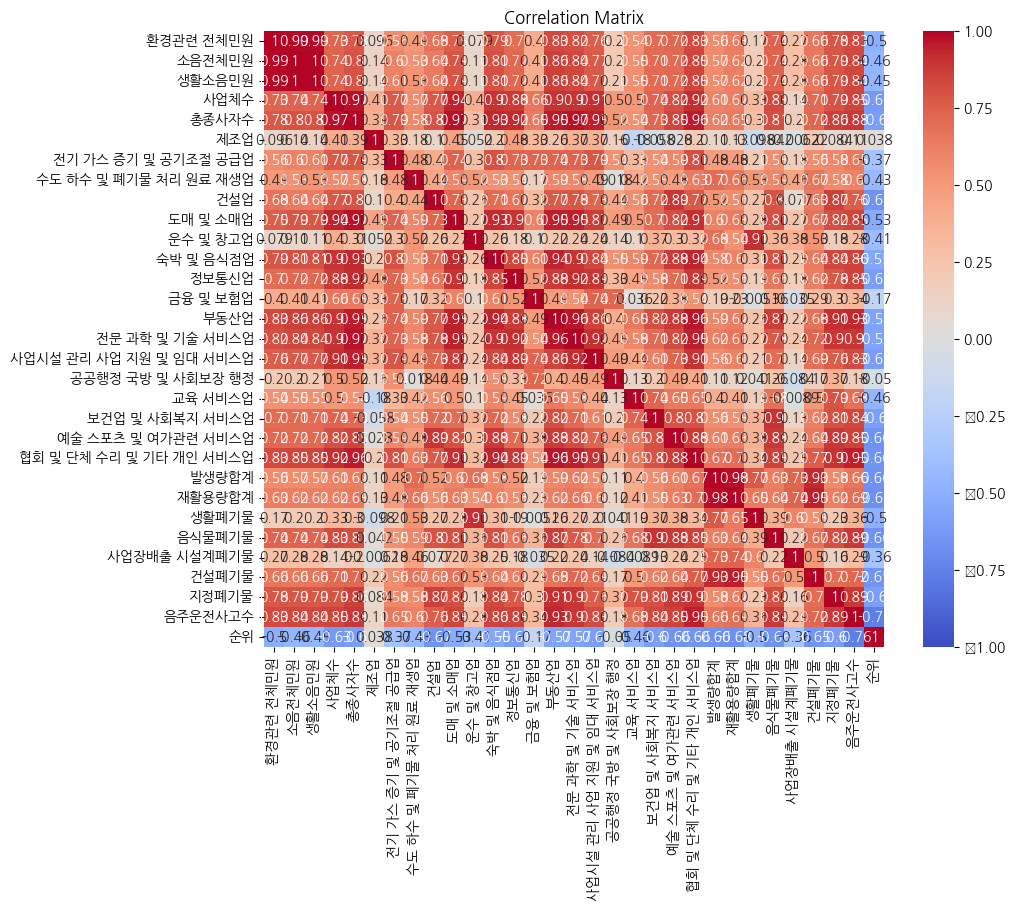

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True, cmap='coolwarm',vmax=1.0,vmin=-1.0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
def get_sorted_correlations(df, target_column):
    corr_matrix = df.corr()
    target_corr = corr_matrix[target_column].drop(target_column)
    sorted_corr = target_corr.sort_values(ascending=False)
    return sorted_corr


# 상관분석 후 'A' 열과 가장 높은 상관관계를 가지는 열 찾기
sorted_corr = get_sorted_correlations(mat, '음주운전사고수')
print(f"'A' 열과의 상관관계 (높은 순서대로):")
print(sorted_corr)

'A' 열과의 상관관계 (높은 순서대로):
 협회 및 단체 수리 및 기타 개인 서비스업    0.983704
음식물폐기물                      0.980154
부동산업                        0.975840
지정폐기물                       0.974574
예술 스포츠 및 여가관련 서비스업          0.963842
전문 과학 및 기술 서비스업             0.960875
보건업 및 사회복지 서비스업             0.960277
소음전체민원                      0.952165
환경관련 전체민원                   0.951982
생활소음민원                      0.951958
숙박 및 음식점업                   0.949777
건설업                         0.943069
총종사자수                       0.941681
도매 및 소매업                    0.936768
사업체수                        0.931050
정보통신업                       0.920267
사업시설 관리 사업 지원 및 임대 서비스업     0.904208
교육 서비스업                     0.890797
건설폐기물                       0.866779
전기 가스 증기 및 공기조절 공급업         0.788650
수도 하수 및 폐기물 처리 원료 재생업       0.787883
재활용량합계                      0.774973
발생량합계                       0.712410
금융 및 보험업                    0.410931
생활폐기물                       0.321355
사업장배출 시설계폐기물                0.258145
공공행정 국방 및 사회보장

### 함수

In [ ]:
# 가장 높은 상관관계 순서대로 출력
def get_sorted_correlations(df, target_column):
    corr_matrix = df.corr()
    target_corr = corr_matrix[target_column].drop(target_column)
    sorted_corr = target_corr.sort_values(ascending=False)
    return sorted_corr


# 상관분석 후 'A' 열과 가장 높은 상관관계를 가지는 열 찾기
sorted_corr = get_sorted_correlations(mat, '음주운전사고수')
print(f"'A' 열과의 상관관계 (높은 순서대로):")
print(sorted_corr)

# 3.스케일링

In [ ]:
scaler = MinMaxScaler()
df_scaled = df.apply(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten(), axis=1)


In [ ]:
# 특정 열들의 리스트
industry_columns = [
    '제조업', '전기 가스 증기 및 공기조절 공급업', '수도 하수 및 폐기물 처리 원료 재생업', '건설업', '도매 및 소매업',
    '운수 및 창고업', '숙박 및 음식점업', '정보통신업', '금융 및 보험업', '부동산업', '전문 과학 및 기술 서비스업',
    '사업시설 관리 사업 지원 및 임대 서비스업', '공공행정 국방 및 사회보장 행정', '교육 서비스업',
    '보건업 및 사회복지 서비스업', '예술 스포츠 및 여가관련 서비스업', ' 협회 및 단체 수리 및 기타 개인 서비스업'
]

waste_columns = [
    '생활폐기물', '음식물폐기물', '사업장배출 시설계폐기물', '건설폐기물', '지정폐기물'
]

# 산업 관련 열 스케일링
industry_sum = numeric_df[industry_columns].sum(axis=1)
for col in industry_columns:
    numeric_df[col] = numeric_df[col] / industry_sum

# 폐기물 관련 열 스케일링
waste_sum = numeric_df[waste_columns].sum(axis=1)
for col in waste_columns:
    numeric_df[col] = numeric_df[col] / waste_sum

# 결과 확인
print("Scaled Numeric DataFrame:")
print(numeric_df.head())


Scaled Numeric DataFrame:
     환경관련 전체민원  소음전체민원  생활소음민원   사업체수   총종사자수       제조업  전기 가스 증기 및 공기조절 공급업  \
자치구                                                                            
종로구       2800    2480    2480  47595  278403  0.044543             0.002461   
중구        2820    2820    2817  68143  386148  0.065786             0.001660   
용산구       3549    3080    3040  28047  151851  0.021383             0.000191   
성동구       2916    2631    2622  41306  205900  0.122223             0.002200   
광진구       2280    1892    1892  33325  129917  0.050518             0.000115   

     수도 하수 및 폐기물 처리 원료 재생업       건설업  도매 및 소매업  ...  보건업 및 사회복지 서비스업  \
자치구                                             ...                    
종로구               0.000428  0.099094  0.150526  ...         0.076858   
중구                0.001072  0.018970  0.206450  ...         0.029757   
용산구               0.001831  0.035648  0.231325  ...         0.053468   
성동구               0.003832  0.042914  0.197908  ...  

In [ ]:
# 지정된 열 제거
columns_to_remove = ['환경관련 전체민원', '소음전체민원', '사업체수', '총종사자수', '발생량합계', '재활용량합계']
numeric_df = numeric_df.drop(columns=columns_to_remove)

##산업스케일링

In [ ]:
mg_df.columns

Index(['환경관련 전체민원', '소음전체민원', '생활소음민원', '사업체수', '총종사자수', '제조업',
       '전기 가스 증기 및 공기조절 공급업', '수도 하수 및 폐기물 처리 원료 재생업', '건설업', '도매 및 소매업',
       '운수 및 창고업', '숙박 및 음식점업', '정보통신업', '금융 및 보험업', '부동산업', '전문 과학 및 기술 서비스업',
       '사업시설 관리 사업 지원 및 임대 서비스업', '공공행정 국방 및 사회보장 행정', '교육 서비스업',
       '보건업 및 사회복지 서비스업', '예술 스포츠 및 여가관련 서비스업', ' 협회 및 단체 수리 및 기타 개인 서비스업',
       '발생량합계', '재활용량합계', '생활폐기물', '음식물폐기물', '사업장배출 시설계폐기물', '건설폐기물', '지정폐기물',
       '음주운전사고수', '순위'],
      dtype='object')

In [ ]:
col=['제조업',
       '전기 가스 증기 및 공기조절 공급업', '수도 하수 및 폐기물 처리 원료 재생업', '건설업', '도매 및 소매업',
       '운수 및 창고업', '숙박 및 음식점업', '정보통신업', '금융 및 보험업', '부동산업', '전문 과학 및 기술 서비스업',
       '사업시설 관리 사업 지원 및 임대 서비스업', '공공행정 국방 및 사회보장 행정', '교육 서비스업',
       '보건업 및 사회복지 서비스업', '예술 스포츠 및 여가관련 서비스업', ' 협회 및 단체 수리 및 기타 개인 서비스업'
       ,'음주운전사고수']
df = mg_df[col]
df.head()

,제조업,전기 가스 증기 및 공기조절 공급업,수도 하수 및 폐기물 처리 원료 재생업,건설업,도매 및 소매업,운수 및 창고업,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,전문 과학 및 기술 서비스업,사업시설 관리 사업 지원 및 임대 서비스업,공공행정 국방 및 사회보장 행정,교육 서비스업,보건업 및 사회복지 서비스업,예술 스포츠 및 여가관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업,음주운전사고수
19,12396,685,119,27577,41890,7956,24045,17439,23160,9791,29469,19211,15905,13361,21389,5845,8053,54.0
23,25402,641,414,7325,79717,13177,28353,31542,64067,11132,42260,33530,16325,9864,11490,3005,7888,41.0
8,3247,29,278,5413,35126,4513,16938,14618,6631,4893,19059,10568,5900,7652,8119,3422,5441,79.0
16,25163,453,789,8835,40745,8638,13751,21683,4028,6669,23961,15043,4081,11380,10450,2690,7519,60.5
15,6563,15,291,13875,20711,5525,15018,4472,2763,4510,7253,10293,3846,13378,12890,3376,5134,61.5


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


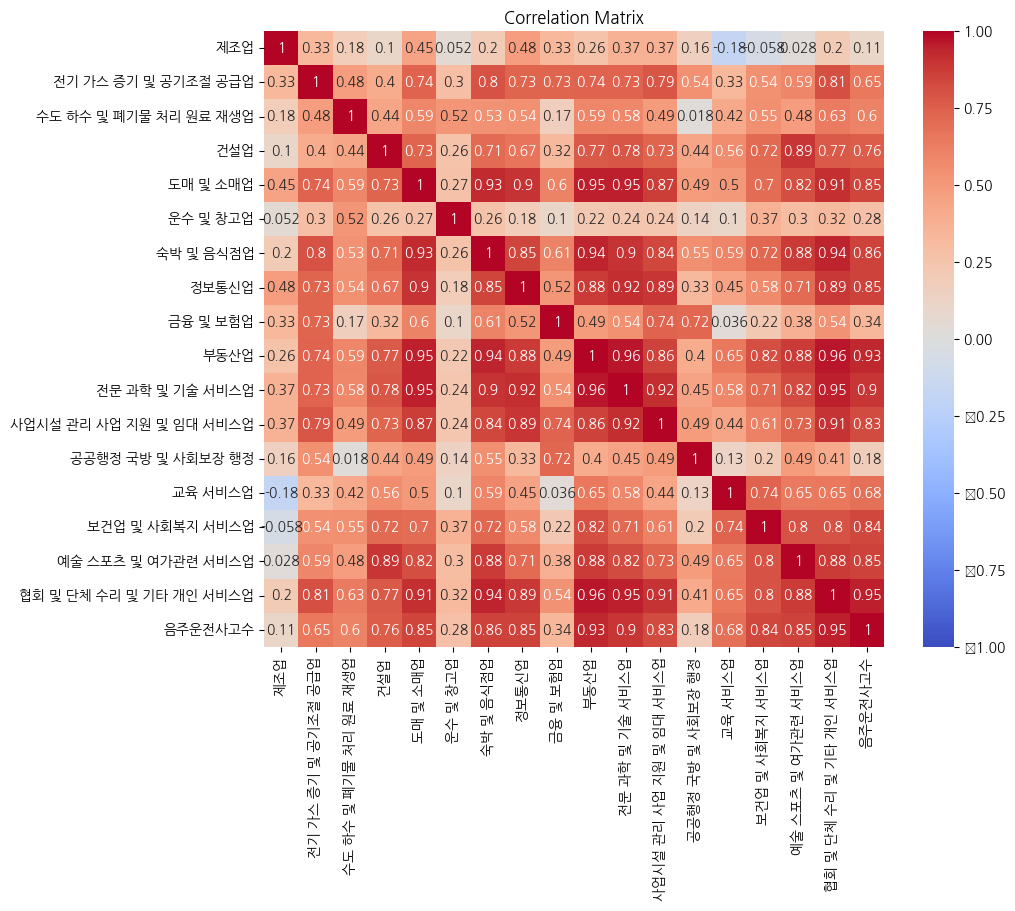

In [ ]:
mat0 = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(mat0, annot=True, cmap='coolwarm',vmax=1.0,vmin=-1.0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# 상관분석 후 'A' 열과 가장 높은 상관관계를 가지는 열 찾기
sorted_corr = get_sorted_correlations(mat0, '음주운전사고수')
print(f"'A' 열과의 상관관계 (높은 순서대로):")
sorted_corr

'A' 열과의 상관관계 (높은 순서대로):


 협회 및 단체 수리 및 기타 개인 서비스업    0.967235
부동산업                        0.962713
전문 과학 및 기술 서비스업             0.916234
보건업 및 사회복지 서비스업             0.916100
예술 스포츠 및 여가관련 서비스업          0.908275
숙박 및 음식점업                   0.883247
건설업                         0.858411
도매 및 소매업                    0.854220
교육 서비스업                     0.830899
정보통신업                       0.824404
사업시설 관리 사업 지원 및 임대 서비스업     0.765277
수도 하수 및 폐기물 처리 원료 재생업       0.630489
전기 가스 증기 및 공기조절 공급업         0.506881
금융 및 보험업                   -0.033999
운수 및 창고업                   -0.075695
공공행정 국방 및 사회보장 행정          -0.147904
제조업                        -0.309263
Name: 음주운전사고수, dtype: float64

In [ ]:
df.columns

Index(['제조업', '전기 가스 증기 및 공기조절 공급업', '수도 하수 및 폐기물 처리 원료 재생업', '건설업',
       '도매 및 소매업', '운수 및 창고업', '숙박 및 음식점업', '정보통신업', '금융 및 보험업', '부동산업',
       '전문 과학 및 기술 서비스업', '사업시설 관리 사업 지원 및 임대 서비스업', '공공행정 국방 및 사회보장 행정',
       '교육 서비스업', '보건업 및 사회복지 서비스업', '예술 스포츠 및 여가관련 서비스업',
       ' 협회 및 단체 수리 및 기타 개인 서비스업', '음주운전사고수'],
      dtype='object')

In [ ]:
xcol=['제조업', '전기 가스 증기 및 공기조절 공급업', '수도 하수 및 폐기물 처리 원료 재생업', '건설업',
       '도매 및 소매업', '운수 및 창고업', '숙박 및 음식점업', '정보통신업', '금융 및 보험업', '부동산업',
       '전문 과학 및 기술 서비스업', '사업시설 관리 사업 지원 및 임대 서비스업', '공공행정 국방 및 사회보장 행정',
       '교육 서비스업', '보건업 및 사회복지 서비스업', '예술 스포츠 및 여가관련 서비스업',
       ' 협회 및 단체 수리 및 기타 개인 서비스업']

x_data = df[xcol]
y_data = df['음주운전사고수']

In [ ]:
# x_data만 행 기준으로 스케일링
scaler =  MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_data), index=x_data.index, columns=x_data.columns)

# 스케일링된 x_data와 y_data 합쳐서 상관분석
scaled_combined_data = pd.concat([x_scaled, y_data], axis=1)
correlation_scaled_combined = scaled_combined_data.corr()

In [ ]:
scaled_combined_data

,제조업,전기 가스 증기 및 공기조절 공급업,수도 하수 및 폐기물 처리 원료 재생업,건설업,도매 및 소매업,운수 및 창고업,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,전문 과학 및 기술 서비스업,사업시설 관리 사업 지원 및 임대 서비스업,공공행정 국방 및 사회보장 행정,교육 서비스업,보건업 및 사회복지 서비스업,예술 스포츠 및 여가관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업,음주운전사고수
19,0.283427,0.541566,0.000000,0.347672,0.223993,0.091524,0.381359,0.152829,0.308404,0.213016,0.205477,0.209993,0.968350,0.265783,0.329436,0.541069,0.215942,54.0
23,0.638763,0.506053,0.337915,0.052759,0.507210,0.198930,0.476440,0.285778,0.883684,0.251225,0.300862,0.391350,1.000000,0.132548,0.083687,0.189758,0.206878,41.0
8,0.033468,0.012107,0.182131,0.024916,0.173350,0.020695,0.224503,0.126236,0.075955,0.073456,0.127847,0.100526,0.214393,0.048272,0.000000,0.241341,0.072457,79.0
16,0.632233,0.354318,0.767468,0.074748,0.215421,0.105554,0.154164,0.192837,0.039349,0.124060,0.164402,0.157203,0.077317,0.190307,0.057868,0.150792,0.186607,60.5
15,0.124064,0.000807,0.197022,0.148141,0.065423,0.041514,0.182127,0.030590,0.021559,0.062543,0.039807,0.097043,0.059608,0.266430,0.118443,0.235651,0.055592,61.5
18,0.283564,0.000807,0.166094,0.055962,0.148815,0.064513,0.125759,0.012830,0.045016,0.080351,0.039732,0.077664,0.067370,0.388654,0.258981,0.125928,0.045814,57.0
17,0.339708,0.075868,0.132875,0.100319,0.049318,0.158980,0.081066,0.005864,0.006807,0.028208,0.006301,0.027269,0.094800,0.047548,0.185695,0.094137,0.043617,58.5
20,0.179171,0.017756,0.171821,0.041590,0.046772,0.058856,0.115761,0.018288,0.004810,0.032682,0.042163,0.038541,0.133157,0.586581,0.236265,0.112939,0.081850,48.0
24,0.102399,0.065375,0.297824,0.001398,0.001363,0.064431,0.073517,0.000000,0.034455,0.000000,0.000000,0.017060,0.038282,0.000000,0.086617,0.080406,0.000549,39.0
22,0.045489,0.000000,0.067583,0.000000,0.000000,0.112405,0.000000,0.001867,0.000000,0.031855,0.004146,0.014261,0.102487,0.024003,0.120379,0.002103,0.000000,42.0


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


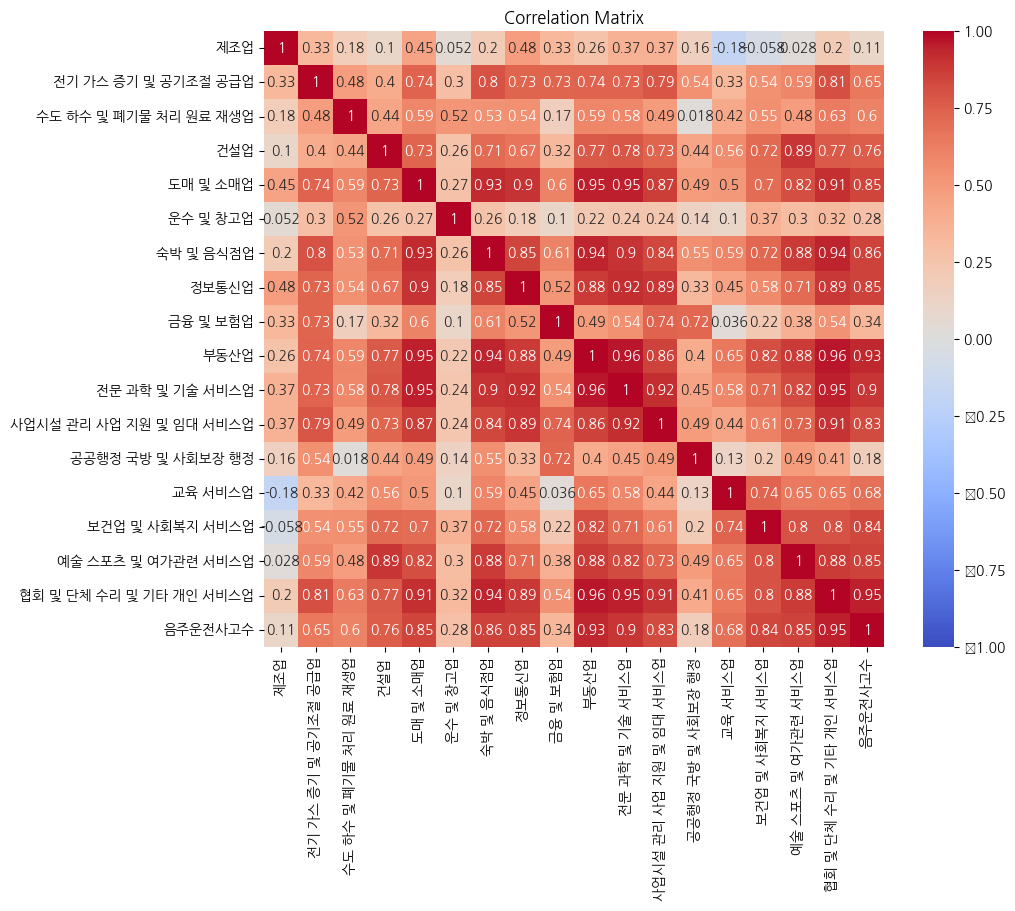

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_scaled_combined, annot=True, cmap='coolwarm',vmax=1.0,vmin=-1.0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
sorted_corr = get_sorted_correlations(correlation_scaled_combined, '음주운전사고수')
print(f"'A' 열과의 상관관계 (높은 순서대로):")
sorted_corr

'A' 열과의 상관관계 (높은 순서대로):


 협회 및 단체 수리 및 기타 개인 서비스업    0.967235
부동산업                        0.962713
전문 과학 및 기술 서비스업             0.916234
보건업 및 사회복지 서비스업             0.916100
예술 스포츠 및 여가관련 서비스업          0.908275
숙박 및 음식점업                   0.883247
건설업                         0.858411
도매 및 소매업                    0.854220
교육 서비스업                     0.830899
정보통신업                       0.824404
사업시설 관리 사업 지원 및 임대 서비스업     0.765277
수도 하수 및 폐기물 처리 원료 재생업       0.630489
전기 가스 증기 및 공기조절 공급업         0.506881
금융 및 보험업                   -0.033999
운수 및 창고업                   -0.075695
공공행정 국방 및 사회보장 행정          -0.147904
제조업                        -0.309263
Name: 음주운전사고수, dtype: float64

##폐기물스케일링

##소음스케일링

##병합

#4.상관분석

#5.가장높은 변수선택 및 저장

In [ ]:
# 생활소음민원 컬럼을 소음전체민원 컬럼으로 나누기
# numeric_df['생활소음민원'] = numeric_df['생활소음민원'] / numeric_df['소음전체민원']


In [ ]:
numeric_df.columns


Index(['생활소음민원', '제조업', '전기 가스 증기 및 공기조절 공급업', '수도 하수 및 폐기물 처리 원료 재생업', '건설업',
       '도매 및 소매업', '운수 및 창고업', '숙박 및 음식점업', '정보통신업', '금융 및 보험업', '부동산업',
       '전문 과학 및 기술 서비스업', '사업시설 관리 사업 지원 및 임대 서비스업', '공공행정 국방 및 사회보장 행정',
       '교육 서비스업', '보건업 및 사회복지 서비스업', '예술 스포츠 및 여가관련 서비스업',
       ' 협회 및 단체 수리 및 기타 개인 서비스업', '생활폐기물', '음식물폐기물', '사업장배출 시설계폐기물', '건설폐기물',
       '지정폐기물'],
      dtype='object')

###스케일링 후 분석

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


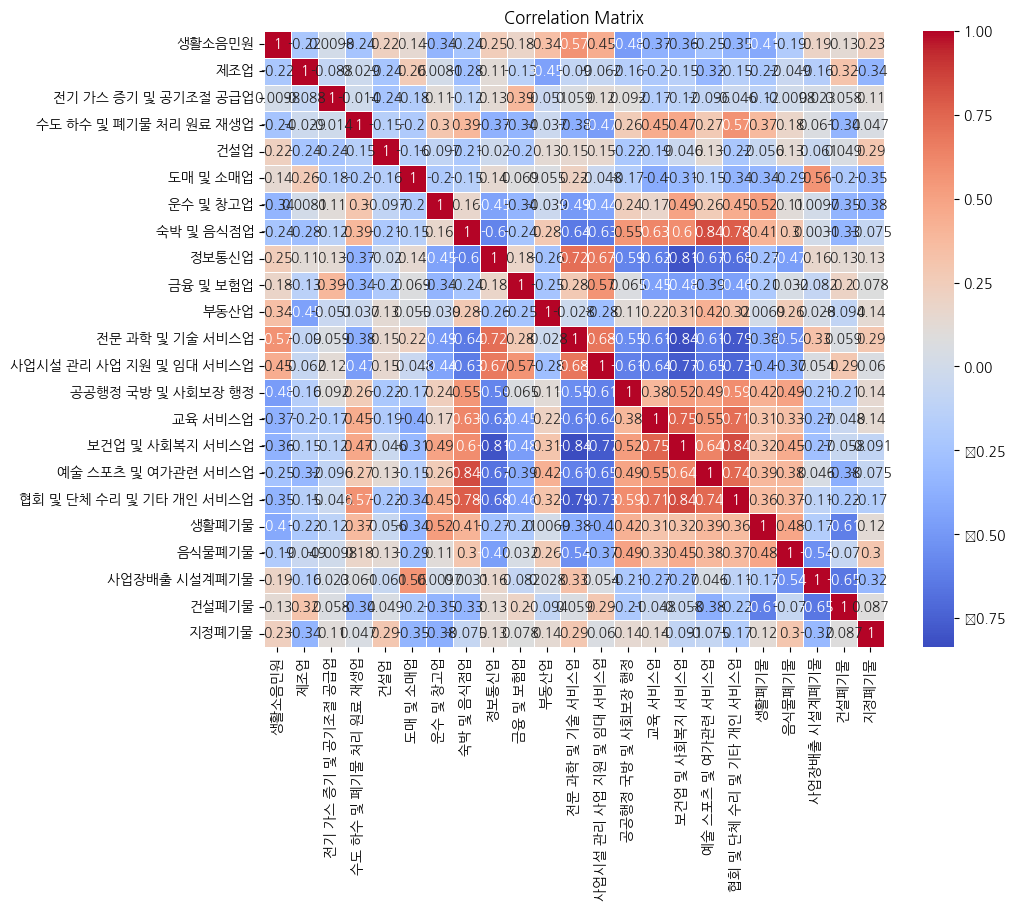

In [ ]:
# 상관 행렬 계산
correlation_matrix = numeric_df.corr()

# 히트맵으로 상관 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


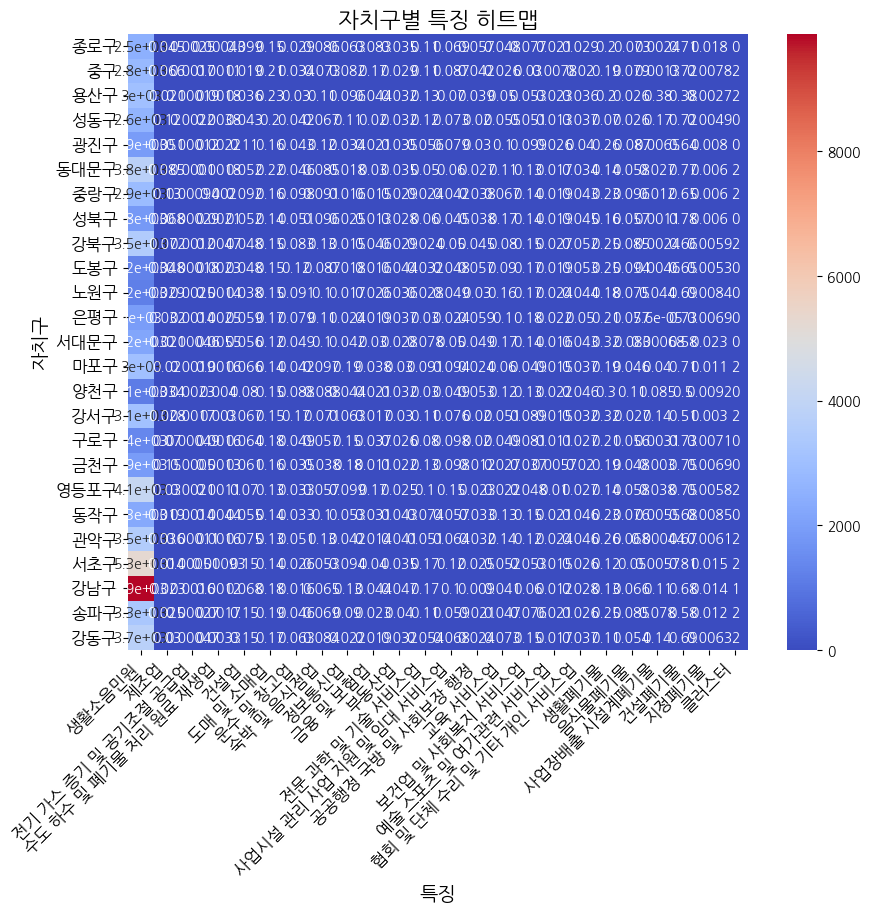

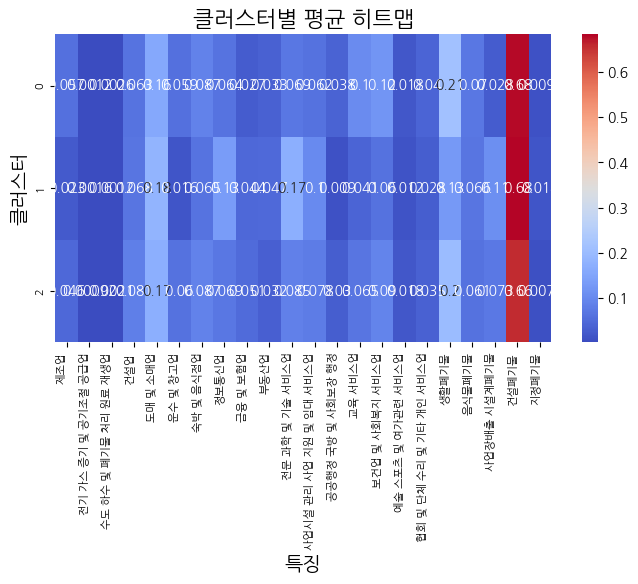

In [ ]:
# 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(numeric_df)
cluster_name='클러스터'

# 클러스터 결과를 데이터프레임에 추가
numeric_df[cluster_name] = clusters

# 각 클러스터의 값들의 평균 계산
cluster_means = numeric_df.groupby(cluster_name).mean()
cluster_means

cluster_means = cluster_means.drop(columns=['생활소음민원'])

# 자치구 전체
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df, annot=True, cmap='coolwarm')
plt.title('자치구별 특징 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('자치구', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 클러스터링 결과 시각화
# 클러스터별
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title('클러스터별 평균 히트맵', fontsize=16)
plt.xlabel('특징', fontsize=14)
plt.ylabel('클러스터', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# 3.분석

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스케일된 데이터프레임을 사용하여 각 열에 대해 박스플롯 생성
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_total)
plt.xticks(rotation=90)
plt.title('Box Plot of Scaled Features')
plt.xlabel('Features')
plt.ylabel('Scaled Values')
plt.show()


In [ ]:
correlation_matrix=df_total.corr()

In [ ]:
# 데이터 준비 (숫자형 데이터만 사용)
X = scaled_df.select_dtypes(include=[np.number])

# VIF 계산 함수
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# 초기 VIF 값 계산
vif_data = calculate_vif(X)
print("Initial VIF Values:")
print(vif_data)

# VIF 값이 10을 초과하는 변수 제거
while vif_data['VIF'].max() > 10:
    max_vif = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
    print(f"Removing feature with high VIF: {max_vif}")
    X = X.drop(columns=[max_vif])
    vif_data = calculate_vif(X)

# 최종 VIF 값
print("Final VIF Values:")
print(vif_data)

# 다중공선성이 제거된 데이터프레임
df_total_vif_removed = X

# 결과 확인
print("Data after removing multicollinearity:")
print(df_total_vif_removed.head())

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Initial VIF Values:
                     Feature  VIF
0                     공장소음민원  inf
1                     교통소음민원  inf
2                     생활소음민원  inf
3                 농업 임업 및 어업  inf
4                         광업  inf
5                        제조업  inf
6        전기 가스 증기 및 공기조절 공급업  inf
7      수도 하수 및 폐기물 처리 원료 재생업  inf
8                        건설업  inf
9                   도매 및 소매업  inf
10                  운수 및 창고업  inf
11                 숙박 및 음식점업  inf
12                     정보통신업  inf
13                  금융 및 보험업  inf
14                      부동산업  inf
15           전문 과학 및 기술 서비스업  inf
16   사업시설 관리 사업 지원 및 임대 서비스업  inf
17         공공행정 국방 및 사회보장 행정  inf
18                   교육 서비스업  inf
19           보건업 및 사회복지 서비스업  inf
20        예술 스포츠 및 여가관련 서비스업  inf
21   협회 및 단체 수리 및 기타 개인 서비스업  inf
22                     생활폐기물  inf
23                    음식물폐기물  inf
24              사업장배출 시설계폐기물  inf
25                     건설폐기물  inf
26                     지정폐기물  inf
Removing feature with high V

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 숫자형 데이터만 선택하여 데이터프레임 생성
numeric_df = df_total.select_dtypes(include=[np.number])

# 스케일링 함수 정의
scaler = MinMaxScaler()

# 각 열마다 스케일링 적용
scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df), index=numeric_df.index, columns=numeric_df.columns)

# 결과 확인
print(scaled_df.head())


     공장소음민원    교통소음민원    생활소음민원  농업 임업 및 어업        광업       제조업  \
자치구                                                               
종로구     0.0  0.000000  0.156257    0.123529  1.000000  0.283427   
중구      0.0  0.052632  0.194666    0.000000  0.175824  0.638763   
용산구     0.0  0.701754  0.220082    0.023529  0.000000  0.033468   
성동구     0.0  0.157895  0.172441    0.117647  0.021978  0.632233   
광진구     0.0  0.000000  0.089241    0.023529  0.000000  0.124064   

     전기 가스 증기 및 공기조절 공급업  수도 하수 및 폐기물 처리 원료 재생업       건설업  도매 및 소매업  ...  \
자치구                                                                  ...   
종로구             0.541566               0.000000  0.347672  0.223993  ...   
중구              0.506053               0.337915  0.052759  0.507210  ...   
용산구             0.012107               0.182131  0.024916  0.173350  ...   
성동구             0.354318               0.767468  0.074748  0.215421  ...   
광진구             0.000807               0.197022  0.148141  0.065423  ...  

In [ ]:
scaled_df.columns

Index(['공장소음민원', '교통소음민원', '생활소음민원', '농업 임업 및 어업', '광업', '제조업',
       '전기 가스 증기 및 공기조절 공급업', '수도 하수 및 폐기물 처리 원료 재생업', '건설업', '도매 및 소매업',
       '운수 및 창고업', '숙박 및 음식점업', '정보통신업', '금융 및 보험업', '부동산업', '전문 과학 및 기술 서비스업',
       '사업시설 관리 사업 지원 및 임대 서비스업', '공공행정 국방 및 사회보장 행정', '교육 서비스업',
       '보건업 및 사회복지 서비스업', '예술 스포츠 및 여가관련 서비스업', ' 협회 및 단체 수리 및 기타 개인 서비스업',
       '생활폐기물', '음식물폐기물', '사업장배출 시설계폐기물', '건설폐기물', '지정폐기물'],
      dtype='object')

In [ ]:

# columns1 리스트에 보고 싶은 열을 지정
columns1 = ['공장소음민원', '교통소음민원', '생활소음민원', '농업 임업 및 어업', '광업','수도 하수 및 폐기물 처리 원료 재생업', '교육 서비스업', '건설폐기물', '제조업',
       '전기 가스 증기 및 공기조절 공급업']

# 각 열에서 가장 높은 순서로 상위 5개의 인덱스를 모두 출력
for column in columns1:
    top_5_indices = df_total[column].nlargest(5).index
    top_5_values = df_total[column].nlargest(5).values
    print(f"\n{column}:")
    for i, (index, value) in enumerate(zip(top_5_indices, top_5_values), 1):
        print(f"{i}. Index {index} with value {value}")



공장소음민원:
1. Index 금천구 with value 32.0
2. Index 종로구 with value 0.0
3. Index 중구 with value 0.0
4. Index 용산구 with value 0.0
5. Index 성동구 with value 0.0

교통소음민원:
1. Index 동작구 with value 57.0
2. Index 서대문구 with value 54.0
3. Index 송파구 with value 45.0
4. Index 용산구 with value 40.0
5. Index 구로구 with value 28.0

생활소음민원:
1. Index 강남구 with value 9883
2. Index 서초구 with value 5252
3. Index 영등포구 with value 4116
4. Index 동대문구 with value 3769
5. Index 강동구 with value 3727

농업 임업 및 어업:
1. Index 강동구 with value 170.0
2. Index 서초구 with value 87.0
3. Index 송파구 with value 87.0
4. Index 강남구 with value 84.0
5. Index 강서구 with value 44.0

광업:
1. Index 종로구 with value 91.0
2. Index 강남구 with value 22.0
3. Index 중구 with value 16.0
4. Index 송파구 with value 7.0
5. Index 중랑구 with value 4.0

수도 하수 및 폐기물 처리 원료 재생업:
1. Index 강남구 with value 992
2. Index 강서구 with value 894
3. Index 성동구 with value 789
4. Index 송파구 with value 696
5. Index 서대문구 with value 653

교육 서비스업:
1. Index 강남구 with value 32632
2. Index 서초구 with value 25650

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 예시 데이터프레임 로드 (사용자의 데이터프레임을 대신 사용하세요)
# df_total = pd.read_csv('path_to_your_file.csv')


# 숫자형 데이터만 선택하여 데이터프레임 생성
numeric_df = df_total.select_dtypes(include=[np.number])

# 스케일링 함수 정의
scaler = MinMaxScaler()

# 각 행마다 스케일링 적용
scaled_rows = numeric_df.apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten(), axis=1)

# 스케일링된 데이터프레임 생성
scaled_df = pd.DataFrame(scaled_rows.tolist(), index=df_total.index, columns=numeric_df.columns)

# 결과 확인
print(scaled_df.head())


     공장소음민원    교통소음민원    생활소음민원  농업 임업 및 어업        광업       제조업  \
자치구                                                               
종로구     0.0  0.000000  0.059203    0.000501  0.002172  0.295918   
중구      0.0  0.000038  0.035338    0.000000  0.000201  0.318652   
용산구     0.0  0.001139  0.086546    0.000114  0.000000  0.092439   
성동구     0.0  0.000221  0.064351    0.000491  0.000049  0.617573   
광진구     0.0  0.000000  0.091352    0.000193  0.000000  0.316885   

     전기 가스 증기 및 공기조절 공급업  수도 하수 및 폐기물 처리 원료 재생업       건설업  도매 및 소매업  ...  \
자치구                                                                  ...   
종로구             0.016352               0.002841  0.658319       1.0  ...   
중구              0.008041               0.005193  0.091888       1.0  ...   
용산구             0.000826               0.007914  0.154102       1.0  ...   
성동구             0.011118               0.019364  0.216836       1.0  ...   
광진구             0.000724               0.014051  0.669934       1.0  ...  

## 상관분석

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


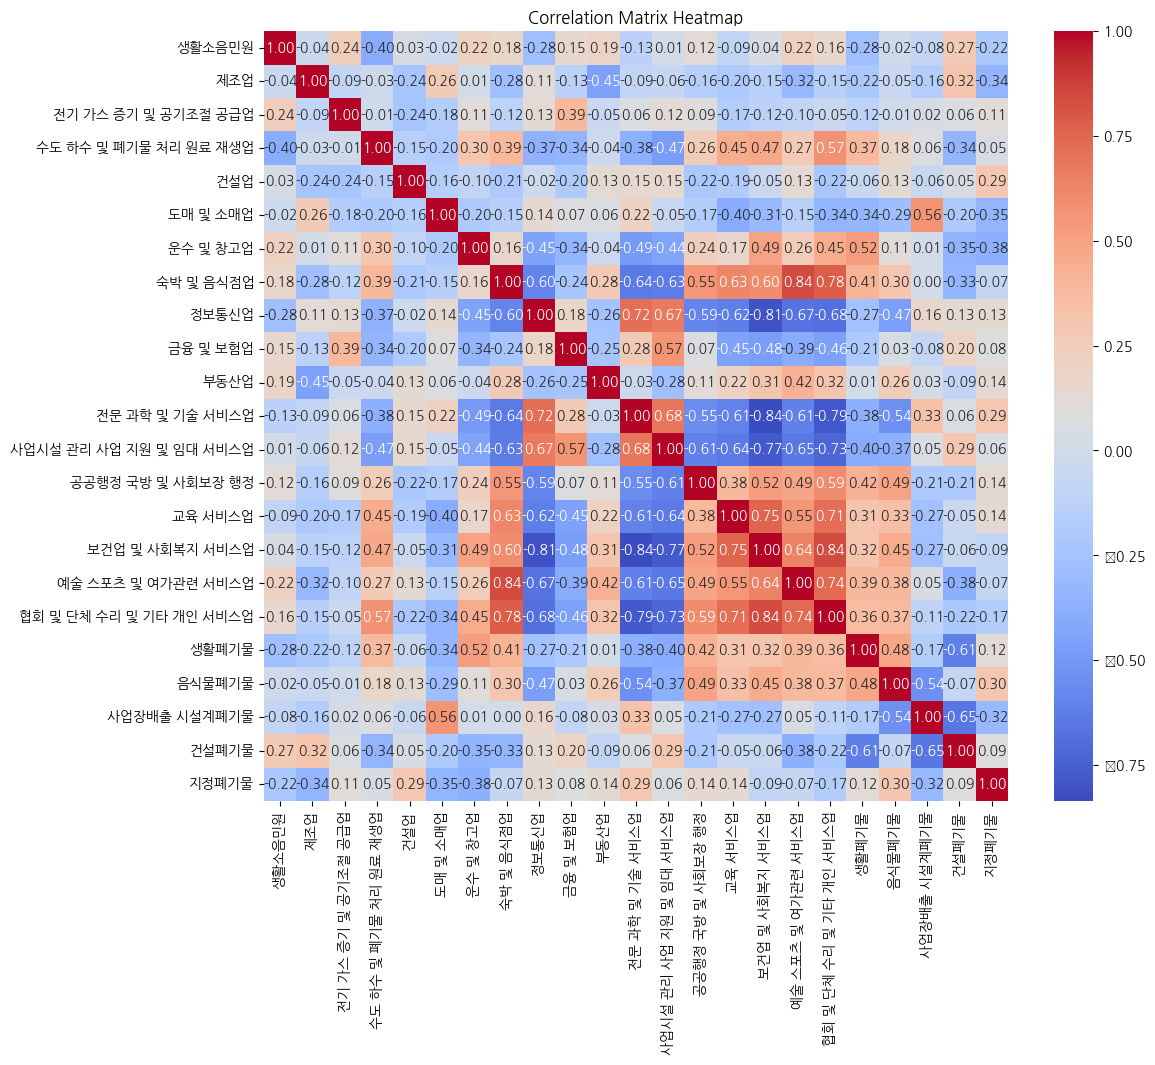

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_total의 상관계수 계산
correlation_matrix = numeric_df.corr()

#correlation_matrix = df_total_vif_removed.corr()
# 상관계수 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
import pandas as pd

# df_total의 상관계수 계산
correlation_matrix = numeric_df.corr().stack().reset_index()
correlation_matrix.columns = ['Feature1', 'Feature2', 'Correlation']

# 자기 자신과의 상관관계 제거 및 중복 제거
correlation_matrix = correlation_matrix[correlation_matrix['Feature1'] != correlation_matrix['Feature2']]
correlation_matrix = correlation_matrix.drop_duplicates(subset=['Correlation'])

# 가장 높은 상관계수 10개
top_10_highest = correlation_matrix.nlargest(20, 'Correlation')

# 가장 낮은 상관계수 10개
top_10_lowest = correlation_matrix.nsmallest(10, 'Correlation')


In [ ]:
top_10_highest

,Feature1,Feature2,Correlation
362,보건업 및 사회복지 서비스업,협회 및 단체 수리 및 기타 개인 서비스업,0.840356
177,숙박 및 음식점업,예술 스포츠 및 여가관련 서비스업,0.839583
178,숙박 및 음식점업,협회 및 단체 수리 및 기타 개인 서비스업,0.783283
337,교육 서비스업,보건업 및 사회복지 서비스업,0.753063
385,예술 스포츠 및 여가관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업,0.736344
195,정보통신업,전문 과학 및 기술 서비스업,0.715575
339,교육 서비스업,협회 및 단체 수리 및 기타 개인 서비스업,0.714703
265,전문 과학 및 기술 서비스업,사업시설 관리 사업 지원 및 임대 서비스업,0.684569
196,정보통신업,사업시설 관리 사업 지원 및 임대 서비스업,0.674331
361,보건업 및 사회복지 서비스업,예술 스포츠 및 여가관련 서비스업,0.640100


In [ ]:
top_10_lowest

,Feature1,Feature2,Correlation
268,전문 과학 및 기술 서비스업,보건업 및 사회복지 서비스업,-0.836234
199,정보통신업,보건업 및 사회복지 서비스업,-0.805961
270,전문 과학 및 기술 서비스업,협회 및 단체 수리 및 기타 개인 서비스업,-0.785796
291,사업시설 관리 사업 지원 및 임대 서비스업,보건업 및 사회복지 서비스업,-0.773884
293,사업시설 관리 사업 지원 및 임대 서비스업,협회 및 단체 수리 및 기타 개인 서비스업,-0.725972
201,정보통신업,협회 및 단체 수리 및 기타 개인 서비스업,-0.681295
200,정보통신업,예술 스포츠 및 여가관련 서비스업,-0.670861
481,사업장배출 시설계폐기물,건설폐기물,-0.652175
292,사업시설 관리 사업 지원 및 임대 서비스업,예술 스포츠 및 여가관련 서비스업,-0.646681
172,숙박 및 음식점업,전문 과학 및 기술 서비스업,-0.639052


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터 준비 (숫자형 데이터만 사용)
X = df_total.select_dtypes(include=[np.number])

# VIF 계산
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# 초기 VIF 값 계산
vif_data = calculate_vif(X)
print("Initial VIF Values:")
print(vif_data)

# VIF 값이 10을 초과하는 변수 제거
while vif_data['VIF'].max() > 10:
    max_vif = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
    print(f"Removing feature with high VIF: {max_vif}")
    X = X.drop(columns=[max_vif])
    vif_data = calculate_vif(X)

# 최종 VIF 값
print("Final VIF Values:")
print(vif_data)

# 다중공선성이 제거된 데이터프레임
df_total_vif_removed = X

# 결과 확인
print("Data after removing multicollinearity:")
print(df_total_vif_removed.head())


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero

Initial VIF Values:
                     Feature  VIF
0                  환경관련 전체민원  inf
1                     소음전체민원  inf
2                     공장소음민원  inf
3                     교통소음민원  inf
4                     생활소음민원  inf
5                       사업체수  inf
6                      총종사자수  inf
7                 농업 임업 및 어업  inf
8                         광업  inf
9                        제조업  inf
10       전기 가스 증기 및 공기조절 공급업  inf
11     수도 하수 및 폐기물 처리 원료 재생업  inf
12                       건설업  inf
13                  도매 및 소매업  inf
14                  운수 및 창고업  inf
15                 숙박 및 음식점업  inf
16                     정보통신업  inf
17                  금융 및 보험업  inf
18                      부동산업  inf
19           전문 과학 및 기술 서비스업  inf
20   사업시설 관리 사업 지원 및 임대 서비스업  inf
21         공공행정 국방 및 사회보장 행정  inf
22                   교육 서비스업  inf
23           보건업 및 사회복지 서비스업  inf
24        예술 스포츠 및 여가관련 서비스업  inf
25   협회 및 단체 수리 및 기타 개인 서비스업  inf
26                     발생량합계  inf
27                    재활용량합계

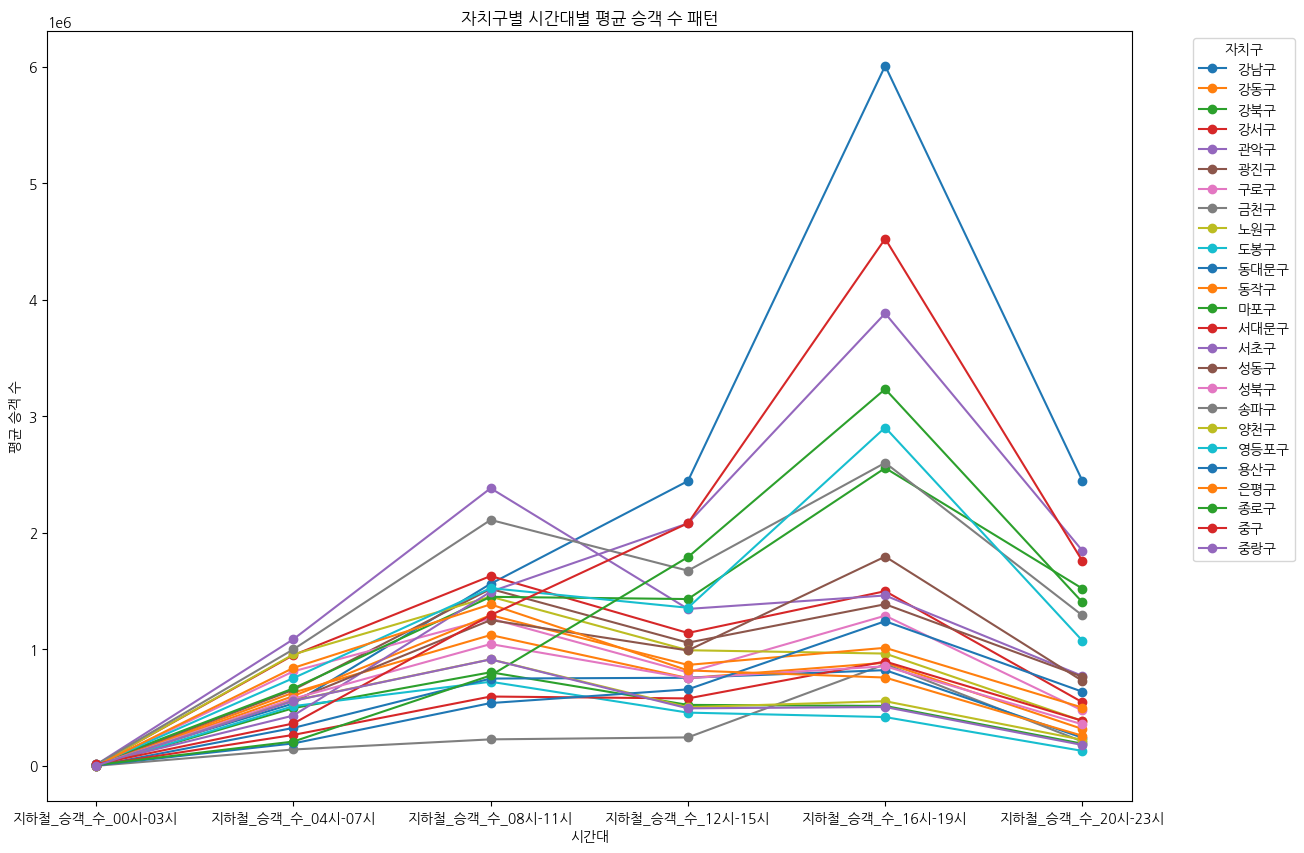

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 자치구별 시간대별 평균 승객 수 계산
mean_passengers_by_gu = subway_proc.groupby('자치구_명칭')[['지하철_승객_수_00시-03시', '지하철_승객_수_04시-07시', '지하철_승객_수_08시-11시', '지하철_승객_수_12시-15시', '지하철_승객_수_16시-19시', '지하철_승객_수_20시-23시']].mean()

# 자치구별 시간대별 승객 수 패턴 시각화
plt.figure(figsize=(14, 10))

for gu in mean_passengers_by_gu.index:
    plt.plot(mean_passengers_by_gu.columns, mean_passengers_by_gu.loc[gu], marker='o', label=gu)

plt.xlabel('시간대')
plt.ylabel('평균 승객 수')
plt.title('자치구별 시간대별 평균 승객 수 패턴')
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

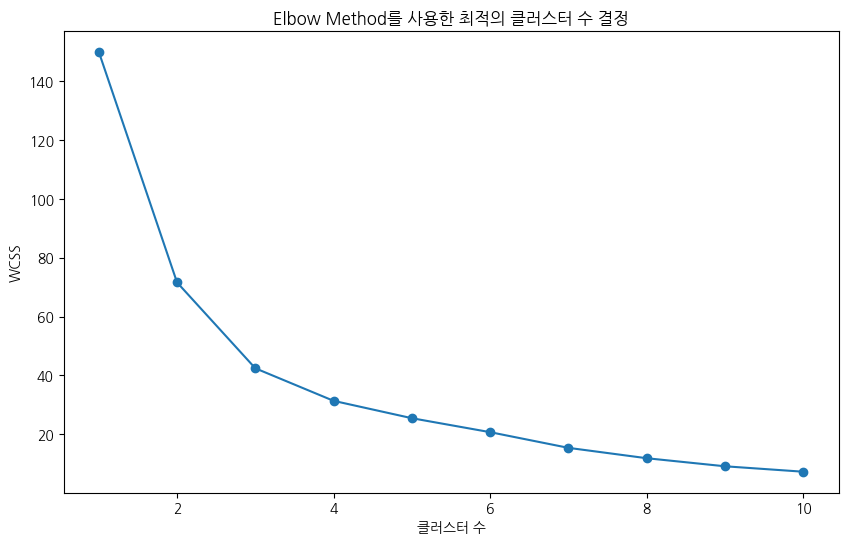

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


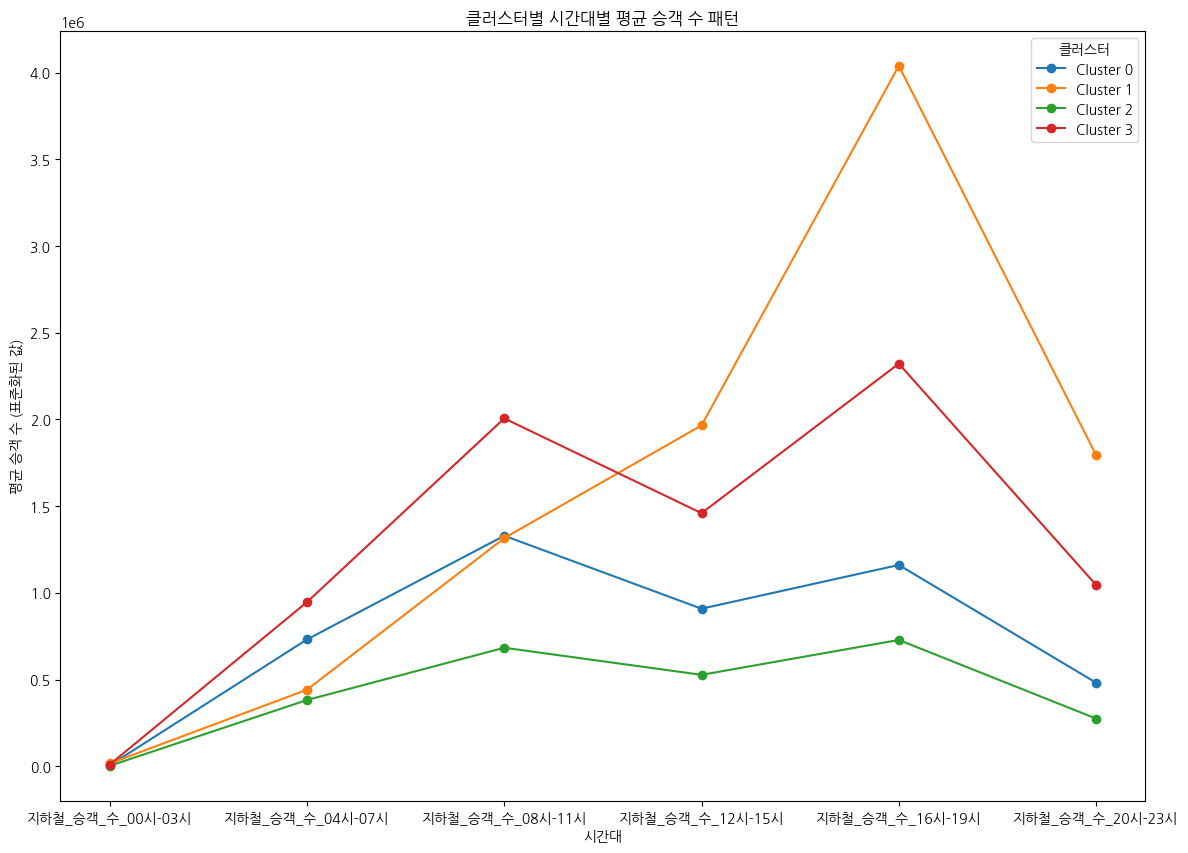

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 자치구별 시간대별 평균 승객 수 데이터 준비
data = subway_proc.groupby('자치구_명칭')[['지하철_승객_수_00시-03시', '지하철_승객_수_04시-07시', '지하철_승객_수_08시-11시', '지하철_승객_수_12시-15시', '지하철_승객_수_16시-19시', '지하철_승객_수_20시-23시']].mean()

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 최적의 군집 수 결정 (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('클러스터 수')
plt.ylabel('WCSS')
plt.title('Elbow Method를 사용한 최적의 클러스터 수 결정')
plt.show()

# K-평균 클러스터링 (클러스터 수는 Elbow Method를 사용하여 결정)
optimal_clusters = 4  # 예시로 3을 선택 (Elbow Method 그래프를 통해 최적의 클러스터 수를 확인하세요)
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 클러스터 레이블을 데이터프레임에 추가
data['Cluster'] = clusters

# 클러스터별 패턴 시각화
plt.figure(figsize=(14, 10))
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster].drop(columns='Cluster').mean()
    plt.plot(cluster_data.index, cluster_data.values, marker='o', label=f'Cluster {cluster}')

plt.xlabel('시간대')
plt.ylabel('평균 승객 수 (표준화된 값)')
plt.title('클러스터별 시간대별 평균 승객 수 패턴')
plt.legend(title='클러스터')
plt.show()


In [ ]:
# 각 클러스터에 속한 자치구 이름 출력
for cluster in range(optimal_clusters):
    cluster_gu_names = data[data['Cluster'] == cluster].index.tolist()
    print(f'클러스터 {cluster}: {cluster_gu_names}')

클러스터 0: ['강동구', '강서구', '광진구', '구로구', '노원구', '동작구', '성동구', '성북구', '은평구']
클러스터 1: ['강남구', '마포구', '서초구', '종로구', '중구']
클러스터 2: ['강북구', '금천구', '도봉구', '동대문구', '서대문구', '양천구', '용산구', '중랑구']
클러스터 3: ['관악구', '송파구', '영등포구']
